In [1]:
import pandas as pd
from IPython.display import display
pd.options.display.max_columns = None
pd.set_option('display.max_rows', None)
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


import plotly.offline as pyoff
import plotly.graph_objs as go
pyoff.init_notebook_mode()

In [2]:
df = pd.read_csv("/Users/ernestng/Desktop/projects/datasci_salary/clean_glassdoor.csv")
df.head()

Job Title Salary Estimate  \
0             Data Scientist          53-91    
1  Healthcare Data Scientist         63-112    
2             Data Scientist          80-90    
3             Data Scientist          56-97    
4             Data Scientist         86-143    

                                     Job Description  Rating  \
0  Data Scientist\nLocation: Albuquerque, NM\nEdu...     3.8   
1  What You Will Do:\n\nI. General Summary\n\nThe...     3.4   
2  KnowBe4, Inc. is a high growth information sec...     4.8   
3  *Organization and Job ID**\nJob ID: 310709\n\n...     3.8   
4  Data Scientist\nAffinity Solutions / Marketing...     2.9   

                                 Company Name         Location  \
0                      Tecolote Research\n3.8  Albuquerque, NM   
1  University of Maryland Medical System\n3.4    Linthicum, MD   
2                                KnowBe4\n4.8   Clearwater, FL   
3                                   PNNL\n3.8     Richland, WA   
4                     Affinity Solutions\n2.9     New York, NY   

     Headquarters                    Size  Founded   Type of ownership  \
0      Goleta, CA   501 to 1000 employees     1973   Company - Private   
1   Baltimore, MD        10000+ employees     1984  Other Organization   
2  Clearwater, FL   501 to 1000 employees     2010   Company - Private   
3    Richland, WA  1001 to 5000 employees     1965          Government   
4    New York, NY     51 to 200 employees     1998   Company - Private   

                           Industry                        Sector  \
0               Aerospace & Defense           Aerospace & Defense   
1  Health Care Services & Hospitals                   Health Care   
2                 Security Services             Business Services   
3                            Energy  Oil, Gas, Energy & Utilities   
4           Advertising & Marketing             Business Services   

                            Revenue  \
0         $50 to $100 million (USD)   
1            $2 to $5 billion (USD)   
2        $100 to $500 million (USD)   
3  $500 million to $1 billion (USD)   
4          Unknown / Non-Applicable   

                                         Competitors  hourly  \
0                                                 -1       0   
1                                                 -1       0   
2                                                 -1       0   
3  Oak Ridge National Laboratory, National Renewa...       0   
4               Commerce Signals, Cardlytics, Yodlee       0   

   employer_provided  min_salary  max_salary  avg_salary  \
0                  0          53          91        72.0   
1                  0          63         112        87.5   
2                  0          80          90        85.0   
3                  0          56          97        76.5   
4                  0          86         143       114.5   

                                 company job_loc  same_state  age  python  \
0                      Tecolote Research      NM           0   47       1   
1  University of Maryland Medical System      MD           0   36       1   
2                                KnowBe4      FL           1   10       1   
3                                   PNNL      WA           1   55       1   
4                     Affinity Solutions      NY           1   22       1   

   r_studio  spark  aws  excel  matlab  tableau  sql  mongodb  stats  apache  \
0         0      0    0      1       1        1    0        0      0       0   
1         0      0    0      0       0        0    0        0      1       0   
2         1      1    0      1       0        0    1        0      1       0   
3         0      0    0      0       0        0    0        0      1       0   
4         1      0    0      1       0        0    1        0      1       0   

   hadoop  
0       0  
1       0  
2       0  
3       0  
4       0

In [3]:
def general_job(job):
    if 'data scientist' in job.lower():
        return 'data scientist'
    elif 'data engineer' in job.lower():
        return 'data engineer'
    elif 'analyst' in job.lower():
        return 'analyst'
    elif 'manager' in job.lower():
        return 'manager'
    elif 'machine learning' in job.lower():
        return 'machine learning'
    elif 'manager' in job.lower():
        return 'manager'
    elif 'director' in job.lower():
        return 'director'
    elif 'big data engineer' in job.lower():
        return 'big data engineer'
    else:
        return 'na'

def seniority(job):
    if 'sr' in job.lower() or 'senior' in job.lower() or 'lead' in job.lower() or 'principal' in job.lower() or 'sr.' in job.lower():
        return 'senior'
    elif 'jr' in job.lower() or 'jr.' in job.lower():
        return 'junior'
    else:
        return 'na'
    

In [4]:
df['rank'] = df['Job Description'].apply(lambda x: seniority(x))
df['job'] = df['Job Description'].apply(lambda x: general_job(x))
df['num_comp'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)


In [5]:
df.head()

Job Title Salary Estimate  \
0             Data Scientist          53-91    
1  Healthcare Data Scientist         63-112    
2             Data Scientist          80-90    
3             Data Scientist          56-97    
4             Data Scientist         86-143    

                                     Job Description  Rating  \
0  Data Scientist\nLocation: Albuquerque, NM\nEdu...     3.8   
1  What You Will Do:\n\nI. General Summary\n\nThe...     3.4   
2  KnowBe4, Inc. is a high growth information sec...     4.8   
3  *Organization and Job ID**\nJob ID: 310709\n\n...     3.8   
4  Data Scientist\nAffinity Solutions / Marketing...     2.9   

                                 Company Name         Location  \
0                      Tecolote Research\n3.8  Albuquerque, NM   
1  University of Maryland Medical System\n3.4    Linthicum, MD   
2                                KnowBe4\n4.8   Clearwater, FL   
3                                   PNNL\n3.8     Richland, WA   
4                     Affinity Solutions\n2.9     New York, NY   

     Headquarters                    Size  Founded   Type of ownership  \
0      Goleta, CA   501 to 1000 employees     1973   Company - Private   
1   Baltimore, MD        10000+ employees     1984  Other Organization   
2  Clearwater, FL   501 to 1000 employees     2010   Company - Private   
3    Richland, WA  1001 to 5000 employees     1965          Government   
4    New York, NY     51 to 200 employees     1998   Company - Private   

                           Industry                        Sector  \
0               Aerospace & Defense           Aerospace & Defense   
1  Health Care Services & Hospitals                   Health Care   
2                 Security Services             Business Services   
3                            Energy  Oil, Gas, Energy & Utilities   
4           Advertising & Marketing             Business Services   

                            Revenue  \
0         $50 to $100 million (USD)   
1            $2 to $5 billion (USD)   
2        $100 to $500 million (USD)   
3  $500 million to $1 billion (USD)   
4          Unknown / Non-Applicable   

                                         Competitors  hourly  \
0                                                 -1       0   
1                                                 -1       0   
2                                                 -1       0   
3  Oak Ridge National Laboratory, National Renewa...       0   
4               Commerce Signals, Cardlytics, Yodlee       0   

   employer_provided  min_salary  max_salary  avg_salary  \
0                  0          53          91        72.0   
1                  0          63         112        87.5   
2                  0          80          90        85.0   
3                  0          56          97        76.5   
4                  0          86         143       114.5   

                                 company job_loc  same_state  age  python  \
0                      Tecolote Research      NM           0   47       1   
1  University of Maryland Medical System      MD           0   36       1   
2                                KnowBe4      FL           1   10       1   
3                                   PNNL      WA           1   55       1   
4                     Affinity Solutions      NY           1   22       1   

   r_studio  spark  aws  excel  matlab  tableau  sql  mongodb  stats  apache  \
0         0      0    0      1       1        1    0        0      0       0   
1         0      0    0      0       0        0    0        0      1       0   
2         1      1    0      1       0        0    1        0      1       0   
3         0      0    0      0       0        0    0        0      1       0   
4         1      0    0      1       0        0    1        0      1       0   

   hadoop    rank               job  num_comp  
0       0      na    data scientist         0  
1       0  senior    data scientist         0  
2       0      na  

In [6]:
df['min_salary'] = df.apply(lambda x: x.min_salary * 8 * 261 / 1000 if x.hourly == 1 else x.min_salary, axis = 1)
df['max_salary'] = df.apply(lambda x: x.max_salary * 8 * 261 / 1000 if x.hourly == 1 else x.max_salary, axis = 1)

In [7]:
df['avg_salary']= (df.min_salary + df.max_salary) / 2

In [8]:
df

Job Title Salary Estimate  \
0                                       Data Scientist          53-91    
1                            Healthcare Data Scientist         63-112    
2                                       Data Scientist          80-90    
3                                       Data Scientist          56-97    
4                                       Data Scientist         86-143    
5                                       Data Scientist         71-119    
6                                       Data Scientist          54-93    
7                                       Data Scientist         86-142    
8                                   Research Scientist          38-84    
9                                       Data Scientist        120-160    
10                                      Data Scientist        126-201    
11                                      Data Scientist         64-106    
12                   Staff Data Scientist - Technology        106-172    
13                                        Data Analyst          46-85    
14                                      Data Scientist         83-144    
15                                     Data Engineer I        102-190    
16                             Scientist I/II, Biology         67-137    
17                             Customer Data Scientist        118-189    
18              Data Scientist - Health Data Analytics        110-175    
19                                      Data Scientist         64-111    
20                                      Data Scientist         81-130    
21            Senior Data Scientist / Machine Learning         73-119    
22                       Data Scientist - Quantitative         86-139    
23                                      Data Scientist         63-105    
24                                      Data Scientist        109-177    
25                       Digital Health Data Scientist         63-110    
26                                      Data Scientist         75-124    
27                              Associate Data Analyst          34-61    
28                             Clinical Data Scientist         63-105    
29                                      Data Scientist          80-90    
30                                      Data Scientist          56-97    
31                                      Data Scientist         72-120    
32            Data Scientist / Machine Learning Expert         86-143    
33                                      Data Scientist         93-149    
34                                      Data Scientist         85-140    
35                                    Web Data Analyst         77-135    
36                                      Data Scientist         82-132    
37                                      Data Scientist         83-137    
38                               Senior Data Scientist        115-180    
39                                       Data Engineer         74-138    
40                                        Data Analyst         64-112    
41                                       Data Engineer         68-129    
42             Data Scientist - Algorithms & Inference        110-175    
43                                           Scientist         52-113    
44                               Senior Data Scientist         110-150   
45                                      Data Scientist         150-160   
46                                 Lead Data Scientist        158-211    
47                              Associate Data Analyst          20-39    
48                         Spectral Scientist/Engineer         56-117    
49   College Hire - Data Scientist - Open to Decemb...          63-99    
50                                      Data Scientist         68-114    
51              Data Scientist, Office of Data Science         86-143    
52                                Data Science Analyst          41-95    
53                                      Data Scie

In [9]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company', 'job_loc', 'same_state', 'age', 'python', 'r_studio',
       'spark', 'aws', 'excel', 'matlab', 'tableau', 'sql', 'mongodb', 'stats',
       'apache', 'hadoop', 'rank', 'job', 'num_comp'],
      dtype='object')

In [10]:
def _removeNonAscii(s): 
    return "".join(i for i in s if ord(i)<128)

def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = text.replace('(ap)', '')
    text = re.sub(r"\'s", " is ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r'\W+', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r"\\", "", text)
    text = re.sub(r"\'", "", text)    
    text = re.sub(r"\"", "", text)
    text = re.sub('[^a-zA-Z ?!]+', '', text)
    text = _removeNonAscii(text)
    text = text.strip()
    return text

In [11]:
df['clean_desc'] = df['Job Description'].apply(clean_text)

In [12]:
df['desc_len'] = [len(i.split()) for i in df.clean_desc]
df.head()

Job Title Salary Estimate  \
0             Data Scientist          53-91    
1  Healthcare Data Scientist         63-112    
2             Data Scientist          80-90    
3             Data Scientist          56-97    
4             Data Scientist         86-143    

                                     Job Description  Rating  \
0  Data Scientist\nLocation: Albuquerque, NM\nEdu...     3.8   
1  What You Will Do:\n\nI. General Summary\n\nThe...     3.4   
2  KnowBe4, Inc. is a high growth information sec...     4.8   
3  *Organization and Job ID**\nJob ID: 310709\n\n...     3.8   
4  Data Scientist\nAffinity Solutions / Marketing...     2.9   

                                 Company Name         Location  \
0                      Tecolote Research\n3.8  Albuquerque, NM   
1  University of Maryland Medical System\n3.4    Linthicum, MD   
2                                KnowBe4\n4.8   Clearwater, FL   
3                                   PNNL\n3.8     Richland, WA   
4                     Affinity Solutions\n2.9     New York, NY   

     Headquarters                    Size  Founded   Type of ownership  \
0      Goleta, CA   501 to 1000 employees     1973   Company - Private   
1   Baltimore, MD        10000+ employees     1984  Other Organization   
2  Clearwater, FL   501 to 1000 employees     2010   Company - Private   
3    Richland, WA  1001 to 5000 employees     1965          Government   
4    New York, NY     51 to 200 employees     1998   Company - Private   

                           Industry                        Sector  \
0               Aerospace & Defense           Aerospace & Defense   
1  Health Care Services & Hospitals                   Health Care   
2                 Security Services             Business Services   
3                            Energy  Oil, Gas, Energy & Utilities   
4           Advertising & Marketing             Business Services   

                            Revenue  \
0         $50 to $100 million (USD)   
1            $2 to $5 billion (USD)   
2        $100 to $500 million (USD)   
3  $500 million to $1 billion (USD)   
4          Unknown / Non-Applicable   

                                         Competitors  hourly  \
0                                                 -1       0   
1                                                 -1       0   
2                                                 -1       0   
3  Oak Ridge National Laboratory, National Renewa...       0   
4               Commerce Signals, Cardlytics, Yodlee       0   

   employer_provided  min_salary  max_salary  avg_salary  \
0                  0        53.0        91.0        72.0   
1                  0        63.0       112.0        87.5   
2                  0        80.0        90.0        85.0   
3                  0        56.0        97.0        76.5   
4                  0        86.0       143.0       114.5   

                                 company job_loc  same_state  age  python  \
0                      Tecolote Research      NM           0   47       1   
1  University of Maryland Medical System      MD           0   36       1   
2                                KnowBe4      FL           1   10       1   
3                                   PNNL      WA           1   55       1   
4                     Affinity Solutions      NY           1   22       1   

   r_studio  spark  aws  excel  matlab  tableau  sql  mongodb  stats  apache  \
0         0      0    0      1       1        1    0        0      0       0   
1         0      0    0      0       0        0    0        0      1       0   
2         1      1    0      1       0        0    1        0      1       0   
3         0      0    0      0       0        0    0        0      1       0   
4         1      0    0      1       0        0    1        0      1       0   

   hadoop    rank               job  num_comp  \
0       0      na    data scientist         0   
1       0  senior    data scientist         0   
2       0      n

In [13]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company', 'job_loc', 'same_state', 'age', 'python', 'r_studio',
       'spark', 'aws', 'excel', 'matlab', 'tableau', 'sql', 'mongodb', 'stats',
       'apache', 'hadoop', 'rank', 'job', 'num_comp', 'clean_desc',
       'desc_len'],
      dtype='object')

In [14]:
df[['age', 'avg_salary', 'desc_len', 'Rating','num_comp']].corr()

age  avg_salary  desc_len    Rating  num_comp
age         1.000000    0.022195  0.139468  0.021655  0.126687
avg_salary  0.022195    1.000000  0.084990  0.012420  0.082246
desc_len    0.139468    0.084990  1.000000  0.010632  0.114609
Rating      0.021655    0.012420  0.010632  1.000000  0.027190
num_comp    0.126687    0.082246  0.114609  0.027190  1.000000

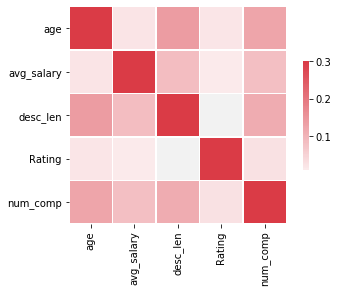

In [15]:
cmap = sns.diverging_palette(220,10, as_cmap=True)
sns.heatmap(df[['age','avg_salary' , 'desc_len', 'Rating', 'num_comp']].corr(), vmax=.3, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink":.5})

Plot for Location: total = 200


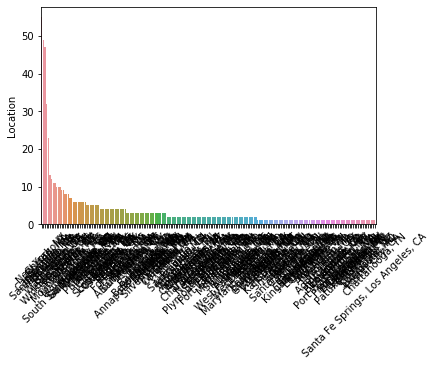

Plot for Headquarters: total = 198


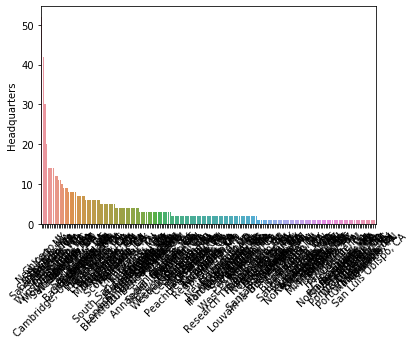

Plot for Founded: total = 102


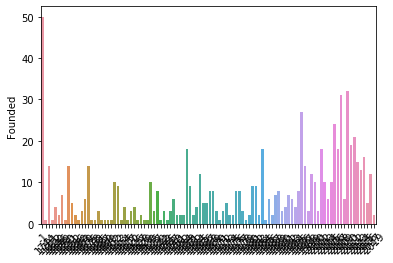

Plot for Type of ownership: total = 11


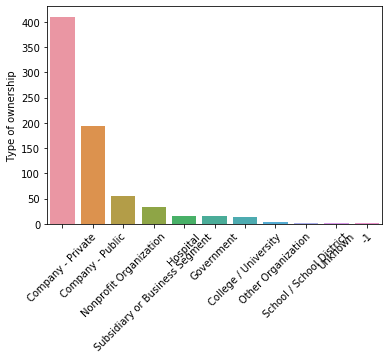

Plot for Industry: total = 60


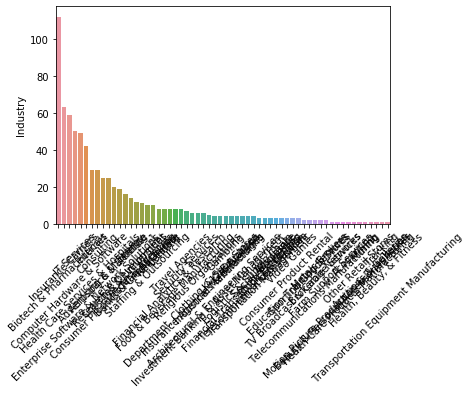

Plot for Sector: total = 25


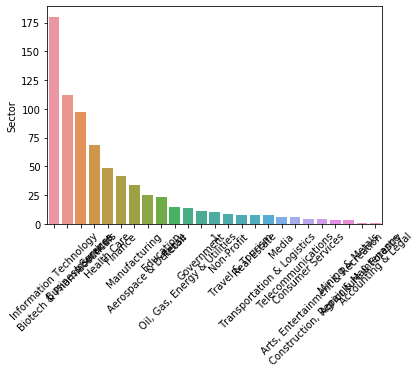

Plot for avg_salary: total = 225


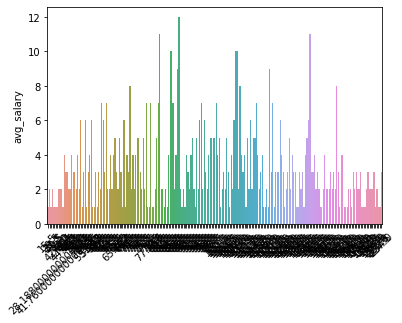

Plot for job_loc: total = 38


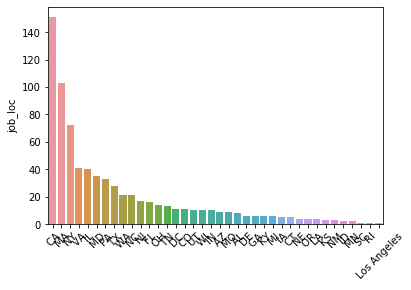

Plot for age: total = 102


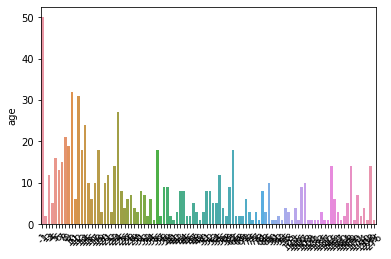

Plot for desc_len: total = 343


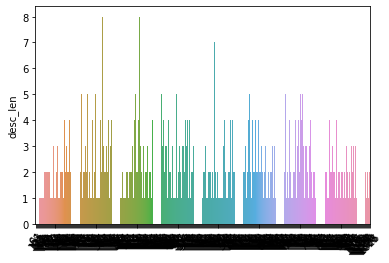

In [16]:
df_explore = df[['Location', 'Headquarters', 'Founded',
       'Type of ownership', 'Industry', 'Sector','avg_salary',
                 'job_loc', 'age', 'desc_len']]
for cat in df_explore:
    cat_num = df_explore[cat].value_counts()
    print("Plot for %s: total = %d" % (cat, len(cat_num)))
    plot = sns.barplot(x=cat_num.index, y=cat_num)
    plot.set_xticklabels(plot.get_xticklabels(), rotation=45)
    plt.show()

In [17]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company', 'job_loc', 'same_state', 'age', 'python', 'r_studio',
       'spark', 'aws', 'excel', 'matlab', 'tableau', 'sql', 'mongodb', 'stats',
       'apache', 'hadoop', 'rank', 'job', 'num_comp', 'clean_desc',
       'desc_len'],
      dtype='object')

In [18]:
pd.pivot_table(df, index=['job','rank'], values=['avg_salary'])

avg_salary
job              rank              
analyst          na       65.277778
                 senior   74.748410
data engineer    na       99.043478
                 senior  106.836207
data scientist   junior   84.000000
                 na      110.358974
                 senior  119.313596
director         na       54.000000
                 senior   95.984750
machine learning na      104.588235
                 senior  109.914634
manager          na       99.500000
                 senior   90.527778
na               na       73.945778
                 senior   97.054212

In [19]:
pd.pivot_table(df, index = ['job_loc'], values=['avg_salary']).sort_values('avg_salary', ascending=False)

avg_salary
job_loc                 
 CA           123.619205
 IL           116.662500
 DC           110.181818
 MA           107.512155
 Los Angeles  107.500000
 NJ           104.558824
 MI           100.250000
 RI           100.000000
 NY            98.652778
 NC            98.452381
 MD            97.357143
 KY            97.000000
 VA            95.621951
 UT            94.150000
 PA            93.912364
 WA            93.190476
 TX            92.734571
 OR            92.125000
 IN            90.300000
 TN            89.375077
 OH            87.571429
 KS            87.000000
 CO            86.392364
 AZ            85.666667
 MN            85.500000
 MO            84.722222
 GA            80.666667
 IA            78.900000
 FL            77.625000
 NM            74.333333
 WI            73.300000
 CT            71.100000
 SC            60.500000
 AL            57.937500
 LA            57.690000
 DE            57.420000
 ID            56.250000
 NE            54.600000

In [20]:
pd.pivot_table(df, index = ['job_loc','job'], values=['avg_salary']).sort_values('job_loc')

avg_salary
job_loc      job                         
 AL          analyst            62.200000
             data engineer      65.000000
             data scientist     48.000000
             na                 39.500000
 AZ          analyst            55.000000
             data engineer      65.833333
             data scientist    106.166667
             na                100.000000
 CA          na                113.428571
             manager            62.500000
             machine learning  122.843750
             analyst            87.437500
             data scientist    142.598684
             data engineer     138.625000
             director           85.000000
 CO          na                 65.772000
             machine learning  100.500000
             analyst            29.500000
             data engineer      99.000000
             data scientist    108.666667
 CT          data scientist     84.000000
             na                 62.500000
 DC          analyst            63.500000
             data engineer      72.666667
             data scientist    153.200000
             machine learning  101.000000
 DE          na                 57.420000
 FL          na                122.000000
             analyst            40.750000
             data engineer      91.833333
             data scientist     79.928571
 GA          manager            80.000000
             analyst            85.000000
             data scientist     79.500000
 IA          analyst            43.000000
             data engineer     102.833333
 ID          analyst            63.500000
             data scientist     49.000000
 IL          analyst            97.687500
             data engineer     104.500000
             data scientist    126.400000
             machine learning  133.000000
             manager           214.375000
             na                 57.166667
 IN          na                 56.500000
             data scientist     91.833333
             machine learning  114.500000
 KS          machine learning   87.000000
 KY          data scientist     84.000000
             na                103.500000
 LA          analyst            48.000000
             manager            70.500000
             na                 41.760000
 Los Angeles data scientist    107.500000
 MA          analyst            59.125000
             data engineer      91.550000
             data scientist    107.607143
             director          119.085333
             machine learning   87.166667
             manager            96.500000
             na                117.174900
 MD          na                 84.807692
             machine learning   99.000000
             data scientist    103.833333
             data engineer     108.200000
             analyst           107.500000
 MI          data scientist    106.625000
             manager            87.500000
 MN          na                 85.500000
 MO          data scientist    107.000000
             na                 86.000000
             analyst            61.000000
             data engineer      40.500000
 NC          data engineer     101.666667
             data scientist    111.916667
             director          117.500000
             manager            99.500000
             na                 73.333333
 NE          na                 54.600000
 NJ          na                 82.500000
             data scientist    125.083333
             data engineer     112.000000
             analyst            90.062500
 NM          data scientist     74.333333
 NY          analyst            70.527778
             data engineer      97.166667
             data scientist    112.587500
             director           61.000000
             machine learning  113.500000
             manager            74.125000
 OH          analyst            82.750000
             data scientist    104.600000
             machine learning  100.250000
             na                 45.500000

In [21]:
pd.pivot_table(df, index = ['job_loc','job'], values=['avg_salary'], aggfunc='count').sort_values('job_loc')

avg_salary
job_loc      job                         
 AL          analyst                    5
             data engineer              1
             data scientist             1
             na                         1
 AZ          analyst                    1
             data engineer              3
             data scientist             3
             na                         2
 CA          na                         7
             manager                   11
             machine learning          16
             analyst                   16
             data scientist            76
             data engineer             16
             director                   9
 CO          na                         3
             machine learning           1
             analyst                    1
             data engineer              3
             data scientist             3
 CT          data scientist             2
             na                         3
 DC          analyst                    2
             data engineer              3
             data scientist             5
             machine learning           1
 DE          na                         6
 FL          na                         2
             analyst                    4
             data engineer              3
             data scientist             7
 GA          manager                    3
             analyst                    1
             data scientist             2
 IA          analyst                    2
             data engineer              3
 ID          analyst                    1
             data scientist             1
 IL          analyst                    8
             data engineer              5
             data scientist            15
             machine learning           2
             manager                    4
             na                         6
 IN          na                         3
             data scientist             3
             machine learning           4
 KS          machine learning           3
 KY          data scientist             2
             na                         4
 LA          analyst                    1
             manager                    2
             na                         1
 Los Angeles data scientist             1
 MA          analyst                    4
             data engineer             10
             data scientist            42
             director                   3
             machine learning           3
             manager                    1
             na                        40
 MD          na                        13
             machine learning           1
             data scientist            15
             data engineer              5
             analyst                    1
 MI          data scientist             4
             manager                    2
 MN          na                         2
 MO          data scientist             4
             na                         2
             analyst                    2
             data engineer              1
 NC          data engineer              3
             data scientist             6
             director                   3
             manager                    3
             na                         6
 NE          na                         4
 NJ          na                         1
             data scientist             6
             data engineer              2
             analyst                    8
 NM          data scientist             3
 NY          analyst                   18
             data engineer              3
             data scientist            40
             director                   1
             machine learning           6
             manager                    4
 OH          analyst                    2
             data scientist             5
             machine learning           4
             na                         3

In [22]:
pd.pivot_table(df[df.job == 'data scientist'], index = 'job_loc', values=['avg_salary']).sort_values('avg_salary', ascending=False)

avg_salary
job_loc                 
 DC           153.200000
 CA           142.598684
 UT           140.500000
 IL           126.400000
 NJ           125.083333
 NY           112.587500
 NC           111.916667
 WA           111.318182
 PA           109.625000
 CO           108.666667
 MA           107.607143
 Los Angeles  107.500000
 TX           107.071429
 MO           107.000000
 MI           106.625000
 VA           106.473684
 AZ           106.166667
 OH           104.600000
 MD           103.833333
 WI           100.500000
 OR            92.125000
 TN            92.000000
 IN            91.833333
 KY            84.000000
 CT            84.000000
 FL            79.928571
 GA            79.500000
 NM            74.333333
 ID            49.000000
 AL            48.000000

In [23]:
df_inspect = df[['Rating', 'Industry', 'Sector', 'Revenue',
       'company', 'job_loc', 'age', 'python', 'r_studio',
       'spark', 'aws', 'excel', 'matlab', 'tableau', 'sql', 'mongodb', 'stats',
       'apache', 'hadoop', 'rank', 'job', 'num_comp','avg_salary']]

In [24]:
for i in df_inspect.columns:
    print(i)
    print(pd.pivot_table(df, index=i, values='avg_salary').sort_values('avg_salary', ascending=False))

Rating
        avg_salary
Rating            
-1.0    136.181818
 5.0    134.700000
 2.5    120.000000
 4.5    117.714286
 4.1    116.368421
 3.9    113.071429
 2.6    109.083333
 4.4    108.606061
 4.0    107.331234
 3.2    107.054286
 3.7    105.816656
 3.5    104.897959
 3.3    104.076821
 4.7    103.983871
 4.3    102.468750
 4.2    100.442308
 2.2     97.750000
 3.8     97.471410
 4.6     97.250000
 2.1     95.900000
 3.4     93.505909
 3.6     90.339739
 1.9     87.500000
 3.1     86.580000
 3.0     85.588235
 2.7     85.348286
 2.8     83.928571
 2.3     81.500000
 2.9     81.138889
 4.8     80.277778
 2.4     60.214286
Industry
                                          avg_salary
Industry                                            
Other Retail Stores                       163.500000
Motion Picture Production & Distribution  146.000000
Financial Analytics & Research            145.125000
Health, Beauty, & Fitness                 139.500000
Telecommunications Services            

ValueError: Grouper for 'avg_salary' not 1-dimensional

In [25]:
for i in df_inspect.columns:
    print(i)
    print(pd.pivot_table(df, index=i, values='avg_salary', aggfunc='count').sort_values('avg_salary', ascending=False))

Rating
        avg_salary
Rating            
 3.9            63
 3.7            61
 3.8            61
 3.5            49
 4.0            47
 3.6            46
 3.4            44
 3.3            39
 3.2            35
 4.4            33
 4.3            32
 4.7            31
 4.2            26
 3.1            25
 4.1            19
 2.9            18
 3.0            17
 2.7            14
 2.6            12
-1.0            11
 4.6            10
 4.8             9
 2.8             7
 2.4             7
 4.5             7
 2.1             5
 5.0             5
 1.9             3
 2.5             2
 2.3             2
 2.2             2
Industry
                                          avg_salary
Industry                                            
Biotech & Pharmaceuticals                        112
Insurance Carriers                                63
Computer Hardware & Software                      59
IT Services                                       50
Health Care Services & Hospitals       

ValueError: Grouper for 'avg_salary' not 1-dimensional

In [26]:
from nltk.tokenize import word_tokenize, sent_tokenize
from functools import reduce
from string import punctuation

stop_words = []

f = open('/Users/ernestng/Desktop/projects/datasci_salary/stopwords.txt', 'r')
for l in f.readlines():
    stop_words.append(l.replace('\n', ''))
    
additional_stop_words = ['a','pm','tian','will','sooo']
stop_words += additional_stop_words

def _removeNonAscii(s): 
    return "".join(i for i in s if ord(i)<128)

def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = text.replace('(ap)', '')
    text = re.sub(r"\'s", " is ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r'\W+', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r"\\", "", text)
    text = re.sub(r"\'", "", text)    
    text = re.sub(r"\"", "", text)
    text = re.sub('[^a-zA-Z ?!]+', '', text)
    text = _removeNonAscii(text)
    text = text.strip()
    return text

def tokenizer(text):
    text = clean_text(text)    
    tokens = [word_tokenize(sent) for sent in sent_tokenize(text)]
    tokens = list(reduce(lambda x,y: x+y, tokens))
    tokens = list(filter(lambda token: token not in (stop_words + list(punctuation)) , tokens))
    return tokens

In [27]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company', 'job_loc', 'same_state', 'age', 'python', 'r_studio',
       'spark', 'aws', 'excel', 'matlab', 'tableau', 'sql', 'mongodb', 'stats',
       'apache', 'hadoop', 'rank', 'job', 'num_comp', 'clean_desc',
       'desc_len'],
      dtype='object')

In [28]:
df['token_desc'] = df['clean_desc'].apply(tokenizer)

In [29]:
flat_list = [item for sublist in list(df['token_desc']) for item in sublist]

In [30]:
from wordcloud import WordCloud
def plot_word_cloud(terms):
    text = ' '.join(list(terms))
    # lower max_font_size
    wordcloud = WordCloud(background_color='white',random_state=2,max_words=2000, width=800, height=1500).generate(text)
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

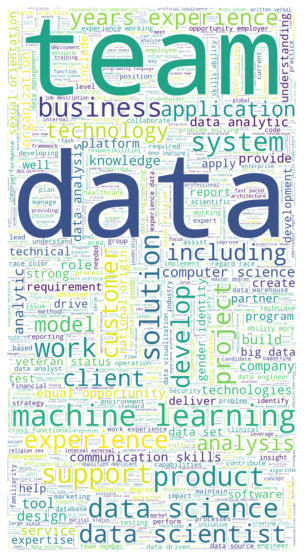

In [31]:
plot_word_cloud(flat_list)

In [32]:
df.to_csv("/Users/ernestng/Desktop/projects/datasci_salary/explored_data.csv")